In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [2]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Delhi Capitals Women,8,5,3,0,0,10,0.396,LWWWL,-,1200/145.0,1228/155.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo...","LMarch 07, 2025, 17th Match, DC Women vs GG Wo..."
2,2Mumbai Indians Women,8,5,3,0,0,10,0.192,WLWWL,-,1242/151.3,1237/154.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W...","LMarch 11, 2025, 20th Match, MI Women vs RCB W..."
4,3Gujarat Giants Women,8,4,4,0,0,8,0.228,LWWWL,-,1252/154.0,1184/149.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo...","LMarch 10, 2025, 19th Match, GG Women vs MI Wo..."
6,4Royal Challengers Bengaluru Women,8,3,5,0,0,6,-0.196,TLLLW,-,1379/154.5,1382/151.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"WMarch 11, 2025, 20th Match, RCB Women vs MI W...","WMarch 11, 2025, 20th Match, RCB Women vs MI W...","WMarch 11, 2025, 20th Match, RCB Women vs MI W...","WMarch 11, 2025, 20th Match, RCB Women vs MI W...","WMarch 11, 2025, 20th Match, RCB Women vs MI W...","WMarch 11, 2025, 20th Match,

In [3]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Delhi Capitals Women,8,5,3,0,0,10,0.396,LWWWL,-,1200/145.0,1228/155.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Mumbai Indians Women,8,5,3,0,0,10,0.192,WLWWL,-,1242/151.3,1237/154.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Gujarat Giants Women,8,4,4,0,0,8,0.228,LWWWL,-,1252/154.0,1184/149.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4Royal Challengers Bengaluru Women,8,3,5,0,0,6,-0.196,TLLLW,-,1379/154.5,1382/151.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5UP Warriorz Women,8,3,5,0,0,6,-0.624,TLLLW,-,1288/160.0,1330/153.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)

In [5]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [6]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Delhi Capitals Women,8,5,3,0,0,10,0.396,LWWWL,...,1200/145.0,1228/155.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,8,5,3,0,0,10,0.192,WLWWL,...,1242/151.3,1237/154.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Gujarat Giants Women,8,4,4,0,0,8,0.228,LWWWL,...,1252/154.0,1184/149.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Royal Challengers Bengaluru Women,8,3,5,0,0,6,-0.196,TLLLW,...,1379/154.5,1382/151.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,8,3,5,0,0,6,-0.624,TLLLW,...,1288/160.0,1330/153.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Teams'].unique()

array(['Delhi Capitals Women', 'Mumbai Indians Women',
       'Gujarat Giants Women', 'Royal Challengers Bengaluru Women',
       'UP Warriorz Women'], dtype=object)

In [8]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Delhi Capitals Women,8,5,3,0,0,10,0.396,LWWWL,...,1200/145.0,1228/155.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,8,5,3,0,0,10,0.192,WLWWL,...,1242/151.3,1237/154.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Gujarat Giants Women,8,4,4,0,0,8,0.228,LWWWL,...,1252/154.0,1184/149.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Royal Challengers Bengaluru Women,8,3,5,0,0,6,-0.196,TLLLW,...,1379/154.5,1382/151.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,8,3,5,0,0,6,-0.624,TLLLW,...,1288/160.0,1330/153.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Rk']=np.arange(1,6)

In [10]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [11]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [12]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [13]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,8,5,3,0,0,10,0.396
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,8,5,3,0,0,10,0.192
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,8,4,4,0,0,8,0.228
3,4,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,8,3,5,0,0,6,-0.196
4,5,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,8,3,5,0,0,6,-0.624


In [14]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [15]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

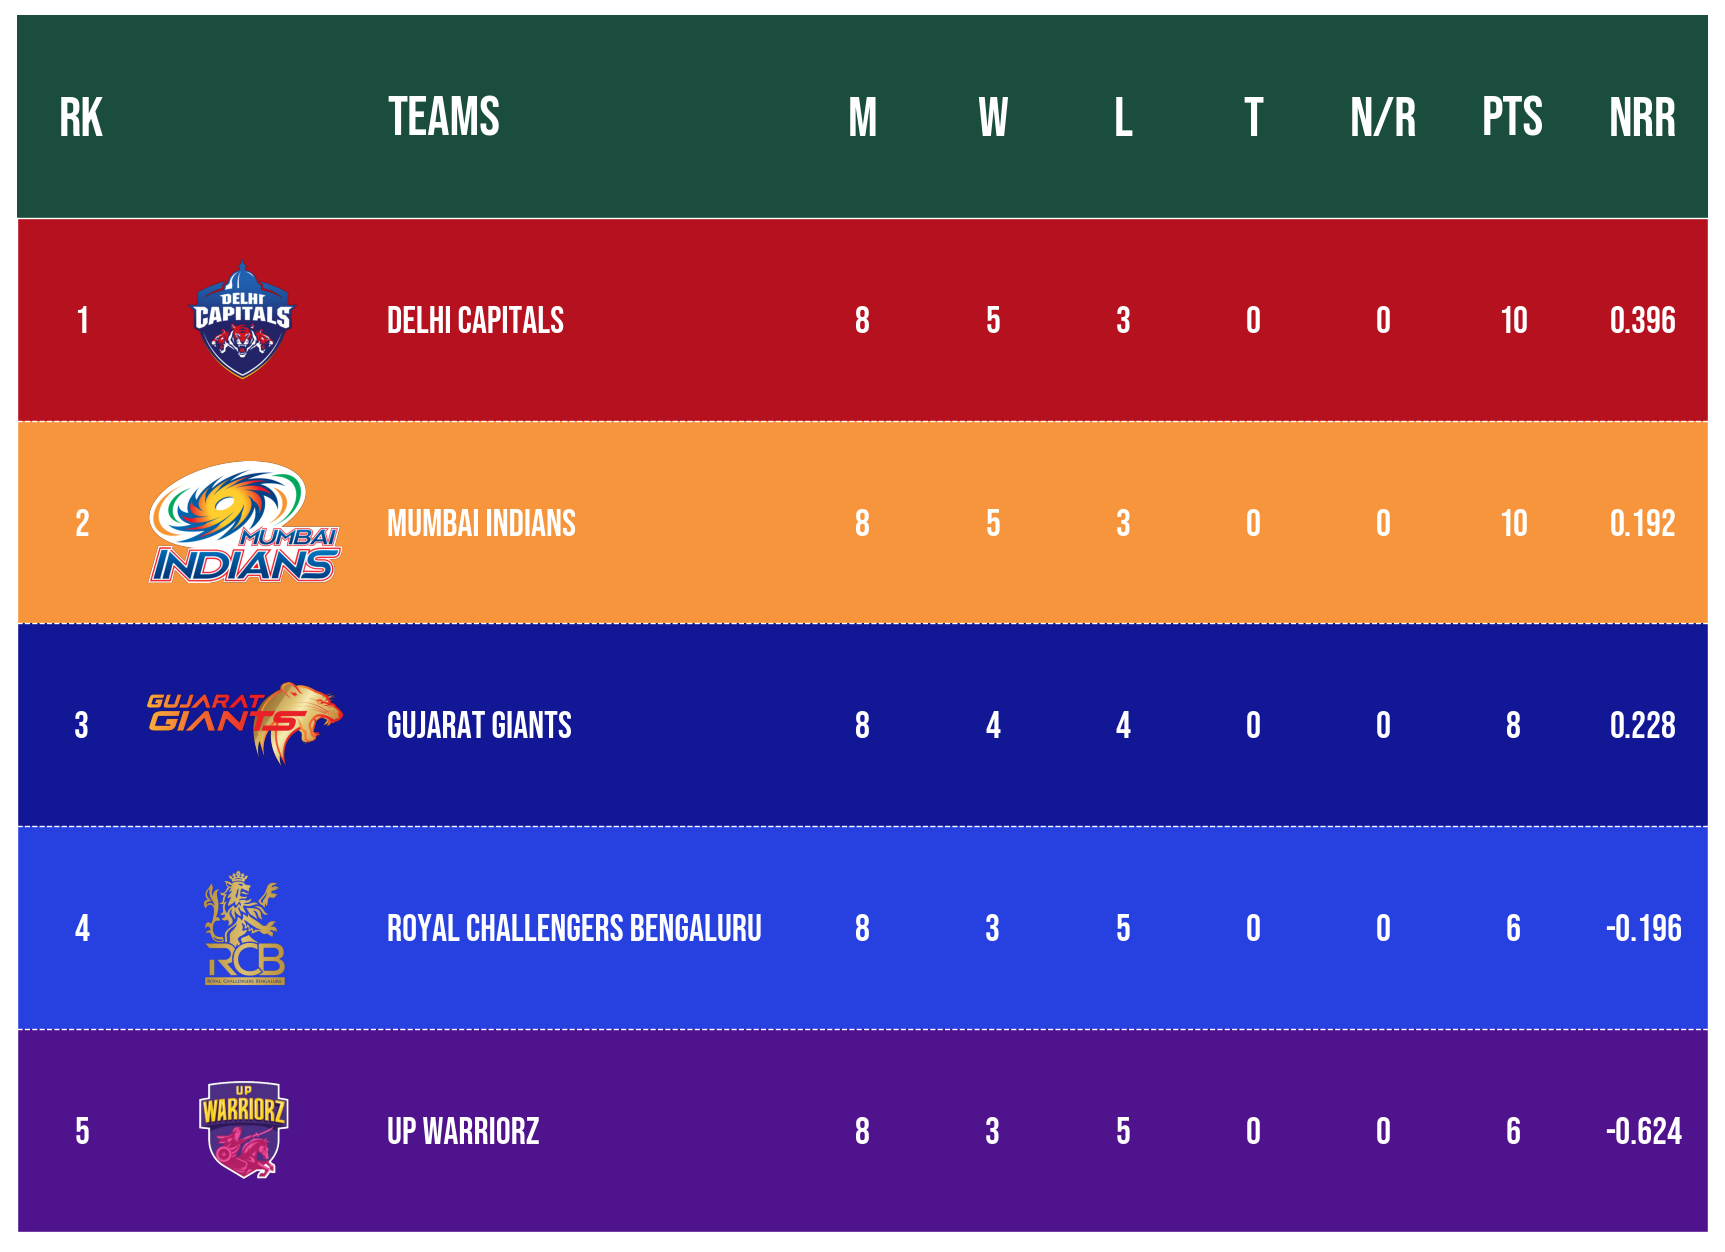

In [16]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [17]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)